<h1><center>INDUSTRY CLUSTERING</center></h1>

<h2><center>CLUSTERING AND SEPARATING THE SP500 SAMPLE</center></h2>

## 1. SOURCES

#### A CURATED LIST OF ML FOR FINANCE APPLICATIONS

https://github.com/firmai/financial-machine-learning

#### SOURCES FOR THIS TUTORIAL

https://github.com/SeanMcOwen/FinanceAndPython.com-ClusteringIndustries

## 2. DATA DOWNLOADING 

In [1]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [ ]:
restartkernel()

### INDEPENDENT VARIABLES

In [1]:
import datetime
import pandas as pd
import pandas_datareader.data as web
import csv
from lxml import html
import requests
import datetime
import matplotlib.pyplot as plt
import numpy as np

startDate = datetime.datetime(2015, 1, 1)
endDate = datetime.datetime(2019, 5, 1)

In [2]:
m_index=web.DataReader("SPY", 'yahoo', startDate, endDate)
oil = web.DataReader("OIL", "yahoo", startDate, endDate)
gold = web.DataReader("GLD", "yahoo", startDate, endDate)
naturalGas = web.DataReader("GAZ", "yahoo", startDate, endDate)

m_index = m_index["Close"].pct_change()
oil = oil["Close"].pct_change()
gold = gold["Close"].pct_change()
naturalGas = naturalGas["Close"].pct_change()

In [3]:
variables = pd.concat([m_index, oil,gold,naturalGas], axis=1)
variables.columns = ["M_Index","Oil","Gold","NaturalGas"]


In [4]:
variables.to_csv("Variables.csv", encoding="UTF-8")

### DATASET

In [13]:
stocksArray=['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES',
'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 
'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP',
'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 
'ANTM', 'AON', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK',
'ADP', 'AN', 'AZO', 'AVB', 'AVY', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BBBY', 'BBY',
'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BMY',
'CHRW', 'COG', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBS', 'CELG',
'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CB', 'CHD', 'CI', 'XEC',
'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 
'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI',
'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS',
'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DTE', 'DD', 'DUK', 'DXC', 'ETFC',
'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX',
'EQR', 'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST',
'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 
'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT',
'GWW', 'HAL', 'HBI', 'HOG', 'HIG', 'HAS', 'HCA', 'HP', 'HSIC', 'HSY', 'HES', 'HPE',
'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 
'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'SJM',
'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB',
'LH', 'LRCX', 'LEG', 'LEN', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB',
'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK',
'MDT', 'MRK', 'MET', 'MTD', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 
'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL',
'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG',
'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR',
'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG',
'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 
'DGX', 'RRC', 'RJF', 'RTN', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RHI', 'ROK',
'ROST', 'RCL', 'CRM', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG',
'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYF', 'SNPS',
'SYY', 'TROW', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TJX', 'TSCO',
'TDG', 'RIG', 'TRV', 'TRIP', 'TSN', 'UDR', 'ULTA', 'USB', 'UA', 'UAA', 'UNP', 'UAL',
'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX',
'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WDC', 'WU', 'WRK',
'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XYL',
'YUM', 'ZBH', 'ZION', 'ZTS']

In [14]:
assetsArray=stocksArray
assetsArray.append('SPY')
assetsArray.append('OIL')
assetsArray.append('GLD')
assetsArray.append('GAZ')


### ASSET LIST DEPURATION

In [15]:
data = pd.read_csv("SP500.csv", header=1) 
# Preview the first 5 lines of the loaded data 
c=data["Symbol"].to_list()

n_data=data.set_index('Symbol').T

n_data["MMM"]
catalog=pd.DataFrame()

for x in stocksArray:
    if x in c:
        col=n_data[x]
        catalog=pd.concat([catalog,col], axis=1)
    
catalog_list=catalog.columns.to_list()

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


## 3. ORGANIZING THE DATA

In [8]:
df = pd.DataFrame()
startDate = datetime.datetime(2015, 1, 1)
endDate = datetime.datetime(2019, 5, 1)
for x in catalog_list:
    stock = web.DataReader(x, 'yahoo', startDate, endDate)
    stock = stock["Close"].pct_change()
    stock.name = x
    stock.to_frame()
    df = pd.concat([df,stock],axis=1)


In [9]:
counter=np.arange(430)
cat=catalog.T
n_cat=cat.reset_index()
n_cat
n_cat.rename(columns={'index': 'Symbol'})
n_cat.fillna(0, inplace=True)

In [10]:
df.to_csv("StockData.csv", encoding="UTF-8")
catalog.fillna(0)
catalog.to_csv("Catalog.csv", encoding="UTF-8")
n_cat.to_csv('n_SP500.csv', encoding="UTF-8")

#### LOCATION OF OUR INFORMATION

> - The catalog of information is at n_SP500.csv
> - The data series for all stocks is at StockData.csv
> - The transposed catalog of information is at Catalog.csv
> - The exogenous variables are at Variables.csv

<h2> <center>LABELING PROCESS STARTS HERE </center></h2>

## 4. REGRESSION ANALYSIS :STATSMODELS

In [18]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [ ]:
restartkernel()

In [1]:
import datetime
import pandas as pd
import pandas_datareader.data as web
import csv
from lxml import html
import requests
import datetime
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv("StockData.csv", header=0) 
df_1 = pd.read_csv("Variables.csv", header=0)
complete=pd.concat([df, df_1], axis=1)
complete.dropna(inplace=True)
del complete["Date"]

#### A GENERAL REGRESSION FUNCTION

In [3]:
def regress(stock):
    result = sm.ols(formula=stock+" ~ M_Index + Oil + Gold + NaturalGas", data=complete).fit()
    print(result.summary())

In [4]:
regress("F")

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     50.46
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           2.25e-37
Time:                        18:53:38   Log-Likelihood:                 2035.5
No. Observations:                 711   AIC:                            -4061.
Df Residuals:                     706   BIC:                            -4038.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0006      0.001     -1.162      0.2

#### A FUNCTION THAT ONLY RECORDS THE VALUE OF SIGNIFICANT PARAMETERS

In [5]:
def regress(stock):
    result = sm.ols(formula=stock+" ~ M_Index + Oil + Gold + NaturalGas", data=complete).fit()
    return pd.DataFrame(result.params[result.pvalues<.05],columns=[stock])

#### CREATE A NEW FRAME WITH ONLY THE ESTIMATED PARAMENTER WHEN STATISTICALLY SIGNIFICANT

In [6]:
df2 = pd.DataFrame()
for stock in complete.columns[1:431]:
    frame = regress(stock)
    df2 = pd.concat([df2,frame], axis=1)
df2 = df2.fillna(0)
df2.head()

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,MMM,ABT,ABBV,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Gold,0.000000,0.000000,0.000000,0.000000,0.00000,0.175639,0.000000,0.000000,0.274093,-0.098904,...,0.000000,0.000000,0.153300,0.00000,0.000000,0.000000,0.000000,0.170071,-0.474861,0.000000
Intercept,0.000000,0.000000,0.000000,0.000000,0.00000,0.000942,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
M_Index,1.061515,1.072202,1.081053,1.053285,1.33767,1.514176,2.049622,0.778218,0.632856,0.702940,...,0.730604,1.161474,0.204412,1.10387,1.408928,1.064455,0.735081,0.961743,1.025764,1.010348
NaturalGas,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Oil,0.000000,-0.019398,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.020855,0.044620,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
df2.to_csv("RegressionMatrix1.csv",encoding="UTF-8")

<h2> <center>CLUSTERING ANALYSIS PROCESS STARTS HERE </center></h2>

## 5. MACHINE LEARNING

In [1]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [ ]:
restartkernel()

In [2]:
import datetime
import pandas as pd
import pandas_datareader.data as web
import csv
from lxml import html
import requests
import datetime
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sm

### READ DE REGRESSION RESULTS

In [3]:
df = pd.read_csv("RegressionMatrix1.csv") 
df.rename(columns={'Unnamed: 0':'Reference'}, inplace=True)
df = df.set_index('Reference').T
for x in df.columns:
    df[x] = (df[x] - df[x].mean())/df[x].std(ddof=0)
df.head()

Reference,Gold,Intercept,M_Index,NaturalGas,Oil
MMM,0.055633,0.003303,0.404206,0.004997,-0.165211
ABT,0.055633,0.003303,0.437462,0.004997,-0.963738
ABBV,0.055633,0.003303,0.465003,0.004997,-0.165211
ACN,0.055633,0.003303,0.378595,0.004997,-0.165211
ATVI,0.055633,0.003303,1.263531,0.004997,-0.165211


## 6. CLUSTERING

 #### MODELING

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=8)
model = model.fit(df)

In [5]:
print(model.cluster_centers_)

[[ 5.35539348e-01  3.30263051e-03 -1.18049852e+00  4.99693278e-03
  -2.57818029e-01]
 [ 7.20925941e-02  3.30263051e-03  4.84302391e-01  4.99693278e-03
  -1.33313358e-01]
 [ 3.95909716e-01 -8.16478030e+00 -2.20441361e-02  4.99693278e-03
  -1.65211220e-01]
 [ 4.77517045e-01 -1.39265539e-01  5.78495848e-01  4.99693278e-03
   3.63646707e+00]
 [-8.70469903e-01  3.30263051e-03 -1.18254918e-01 -9.14876383e+00
   3.62378572e-01]
 [ 6.73764692e-02  4.30189017e+00  9.13670443e-01  4.99693278e-03
  -1.65211220e-01]
 [-1.81880957e+00  3.30263051e-03  3.87507557e-01  4.99693278e-03
  -3.04129777e-01]
 [ 1.64003964e+00  3.30263051e-03  1.42621919e+00  1.61638374e+01
  -2.03131530e+00]]


In [6]:
print(model.labels_)

[1 1 1 1 1 5 1 0 0 0 1 1 1 6 1 0 7 1 1 1 1 0 6 1 0 1 0 6 0 1 6 0 0 6 1 1 1
 1 1 1 1 0 3 0 1 1 0 1 1 6 0 1 1 0 0 1 0 6 6 1 1 1 1 1 6 5 1 0 1 0 1 3 0 6
 1 0 1 6 1 1 0 2 1 3 6 1 4 0 0 1 3 0 1 1 6 6 1 0 6 0 0 1 0 1 6 0 3 3 0 0 1
 1 1 0 0 5 1 1 1 1 6 1 1 6 0 3 0 6 1 1 1 1 0 0 1 0 1 0 1 6 1 1 1 0 0 1 1 1
 0 3 0 0 0 0 1 0 0 0 1 1 0 3 1 1 6 0 1 1 6 0 1 1 1 1 1 1 1 1 3 1 1 1 1 2 0
 1 0 1 1 6 1 3 1 1 6 0 1 3 1 0 3 1 1 1 1 1 0 6 1 0 6 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 0 1 6 1 1 0 6 0 0 1 1 6 2 0 1 1 1 1 1 0 6 1 0 1 1 1 6 6 3 3
 1 0 1 1 5 0 0 1 0 0 6 1 1 1 5 0 1 0 0 1 1 6 1 1 1 0 3 1 1 2 0 1 1 0 1 1 0
 3 6 6 6 0 0 1 6 0 3 0 3 1 1 1 1 5 1 6 0 1 1 0 0 1 0 3 6 1 1 0 1 0 5 0 6 0
 0 0 1 1 1 1 0 6 1 0 0 1 6 0 6 1 1 6 1 1 0 0 1 0 1 0 1 0 6 1 1 0 1 1 6 5 0
 1 0 1 3 1 6 1 1 0 1 1 0 0 0 1 6 1 1 1 6 1 1 1 1 0 6 1 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 1 0 4 1 0 1 0 1 3 0 1 0 1 1 1 0 1 6 1]


#### MAIN RESULTS

In [7]:
df["Group"] = model.labels_
print(df)

Reference      Gold  Intercept   M_Index  NaturalGas       Oil  Group
MMM        0.055633   0.003303  0.404206    0.004997 -0.165211      1
ABT        0.055633   0.003303  0.437462    0.004997 -0.963738      1
ABBV       0.055633   0.003303  0.465003    0.004997 -0.165211      1
ACN        0.055633   0.003303  0.378595    0.004997 -0.165211      1
ATVI       0.055633   0.003303  1.263531    0.004997 -0.165211      1
...             ...        ...       ...         ...       ...    ...
XYL        0.055633   0.003303  0.413355    0.004997 -0.165211      1
YUM        0.055633   0.003303 -0.611576    0.004997 -0.165211      0
ZBH        0.994809   0.003303  0.093740    0.004997 -0.165211      1
ZION      -2.566676   0.003303  0.292957    0.004997 -0.165211      6
ZTS        0.055633   0.003303  0.244985    0.004997 -0.165211      1

[430 rows x 6 columns]


In [8]:
print(df[df["Group"]==1])

Reference      Gold  Intercept   M_Index  NaturalGas       Oil  Group
MMM        0.055633   0.003303  0.404206    0.004997 -0.165211      1
ABT        0.055633   0.003303  0.437462    0.004997 -0.963738      1
ABBV       0.055633   0.003303  0.465003    0.004997 -0.165211      1
ACN        0.055633   0.003303  0.378595    0.004997 -0.165211      1
ATVI       0.055633   0.003303  1.263531    0.004997 -0.165211      1
...             ...        ...       ...         ...       ...    ...
XRX        0.055633   0.003303  0.536004    0.004997 -0.165211      1
XLNX       0.055633   0.003303  1.485266    0.004997 -0.165211      1
XYL        0.055633   0.003303  0.413355    0.004997 -0.165211      1
ZBH        0.994809   0.003303  0.093740    0.004997 -0.165211      1
ZTS        0.055633   0.003303  0.244985    0.004997 -0.165211      1

[217 rows x 6 columns]


In [9]:
for x in range(8):
    print(df[df["Group"]==x])

Reference      Gold  Intercept   M_Index  NaturalGas       Oil  Group
AAP        0.055633   0.003303 -0.477343    0.004997 -0.165211      0
AES        1.569245   0.003303 -0.929674    0.004997 -0.165211      0
AFL       -0.490539   0.003303 -0.711588    0.004997 -0.165211      0
ARE        0.949638   0.003303 -0.862080    0.004997 -0.165211      0
LNT        1.006822   0.003303 -2.089817    0.004997 -0.165211      0
...             ...        ...       ...         ...       ...    ...
WU         0.055633   0.003303 -0.568766    0.004997  0.771078      0
WY         1.090379   0.003303 -0.230064    0.004997 -0.165211      0
WLTW       0.055633   0.003303 -0.625508    0.004997 -1.023740      0
XEL        0.902195   0.003303 -2.262882    0.004997 -0.165211      0
YUM        0.055633   0.003303 -0.611576    0.004997 -0.165211      0

[124 rows x 6 columns]
Reference      Gold  Intercept   M_Index  NaturalGas       Oil  Group
MMM        0.055633   0.003303  0.404206    0.004997 -0.165211    

In [10]:
df = pd.read_csv("RegressionMatrix1.csv",encoding="UTF-8")
SP500 = pd.read_csv("n_SP500.csv", encoding="UTF-8")
df = df.fillna(0)
tickers = []
df = df.transpose()

In [82]:
SP500 = pd.read_csv("Catalog.csv", encoding="UTF-8")
S=SP500.T
new_header = S.iloc[0] #grab the first row for the header
S = S[1:] #take the data less the header row
S.columns = new_header #set the header row as the df header
S.fillna(0, inplace=True)
SP500=S
SP500.columns[3]

'GICS Sub Industry'

## 7. ORGANIZING THE RESULTS

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
def group(n):
    df = pd.read_csv("RegressionMatrix1.csv") 
    df.rename(columns={'Unnamed: 0':'Reference'}, inplace=True)
    df = df.set_index('Reference').T
    df = df.fillna(0)
    SP500 = pd.read_csv("Catalog.csv", encoding="UTF-8")
    S=SP500.T
    new_header = S.iloc[0] #grab the first row for the header
    S = S[1:] #take the data less the header row
    S.columns = new_header #set the header row as the df header
    S.fillna(0, inplace=True)
    SP500=S
 
    
    zScores = pd.DataFrame()
    for x in df.columns:
        zScores[x] = (df[x] - df[x].mean())/df[x].std(ddof=0)
    
    SP500 = pd.concat([SP500,df],axis=1)
    
    model = KMeans(n_clusters=n)
    model = model.fit(zScores)

    SP500["Group"] = model.labels_
    return SP500


In [3]:
S=group(8)

In [17]:
S.rename(columns={'GICS\xa0Sector': 'Sector'}, inplace=True)
S.rename(columns={'GICS Sub Industry': 'Sub Sector'}, inplace=True)
S.to_csv("GroupedSP500.csv",encoding="UTF-8")

#### SUMMARY TABLES

**Sector Classification**

In [18]:
print(S["Sector"].value_counts())

Industrials               60
Financials                58
Consumer Discretionary    55
Health Care               55
Information Technology    55
Consumer Staples          31
Real Estate               26
Utilities                 26
Energy                    24
Materials                 22
Communication Services    18
Name: Sector, dtype: int64


**Looking at how Financials re-group**

In [19]:
print(S[S["Sector"]=="Financials"]["Group"].value_counts())

6    34
0    12
1    10
7     1
5     1
Name: Group, dtype: int64


**Looking at how all sectors are re-classified**

In [20]:
for x in S["Sector"].unique():
    print(S[S["Sector"]==x]["Group"].value_counts())

0    43
6     9
1     5
7     2
2     1
Name: Group, dtype: int64
0    43
1    11
4     1
Name: Group, dtype: int64
0    48
7     5
6     1
1     1
Name: Group, dtype: int64
0    13
1     4
2     1
Name: Group, dtype: int64
0    35
1    12
6     7
2     1
Name: Group, dtype: int64
1    26
Name: Group, dtype: int64
6    34
0    12
1    10
7     1
5     1
Name: Group, dtype: int64
0    16
1     5
3     1
Name: Group, dtype: int64
1    25
6     1
Name: Group, dtype: int64
1    26
0     4
2     1
Name: Group, dtype: int64
3    20
0     3
5     1
Name: Group, dtype: int64


**Another view at Industry re-grouping"

In [21]:
print(S.groupby("Group")["Sector"].value_counts())

Group  Sector                
0      Information Technology    48
       Health Care               43
       Industrials               43
       Consumer Discretionary    35
       Materials                 16
       Communication Services    13
       Financials                12
       Consumer Staples           4
       Energy                     3
1      Consumer Staples          26
       Utilities                 26
       Real Estate               25
       Consumer Discretionary    12
       Health Care               11
       Financials                10
       Industrials                5
       Materials                  5
       Communication Services     4
       Information Technology     1
2      Communication Services     1
       Consumer Discretionary     1
       Consumer Staples           1
       Industrials                1
3      Energy                    20
       Materials                  1
4      Health Care                1
5      Energy                     

In [22]:
df = pd.read_csv("RegressionMatrix1.csv") 
df.rename(columns={'Unnamed: 0':'Reference'}, inplace=True)
df = df.set_index('Reference').T
df = df.fillna(0)

In [23]:
S["Group"]

MMM     0
ABT     0
ABBV    0
ACN     0
ATVI    0
       ..
XYL     0
YUM     1
ZBH     0
ZION    6
ZTS     0
Name: Group, Length: 430, dtype: int32

## 8. VISUALIZATION 

#### RELOAD FORMATED INFORMATION

In [26]:
import pandas as pd
df = pd.read_csv("GroupedSP500.csv", encoding="UTF-8")
print(df.groupby("Group")["Sector"].value_counts())

Group  Sector                
0      Information Technology    48
       Health Care               43
       Industrials               43
       Consumer Discretionary    35
       Materials                 16
       Communication Services    13
       Financials                12
       Consumer Staples           4
       Energy                     3
1      Consumer Staples          26
       Utilities                 26
       Real Estate               25
       Consumer Discretionary    12
       Health Care               11
       Financials                10
       Industrials                5
       Materials                  5
       Communication Services     4
       Information Technology     1
2      Communication Services     1
       Consumer Discretionary     1
       Consumer Staples           1
       Industrials                1
3      Energy                    20
       Materials                  1
4      Health Care                1
5      Energy                     

#### REGRESSION ESTIMATES PER GROUP

In [33]:
print(df.groupby("Group").mean())

           Gold  Intercept   M_Index  NaturalGas       Oil
Group                                                     
0      0.002981   0.000000  1.089174    0.000000  0.001257
1      0.086209   0.000000  0.554811    0.000000 -0.002690
2      0.061619  -0.001722  0.924534    0.000000  0.000000
3      0.080035  -0.000031  1.109370    0.000000  0.094492
4      0.286913   0.000000  1.389952    0.000337 -0.045331
5     -0.167704   0.000000  0.893616   -0.000191  0.012816
6     -0.339434   0.000000  1.056149    0.000000 -0.003375
7      0.002127   0.000906  1.225238    0.000000  0.000000


#### VISUALIZATION OF REGRESSION ESTIMATES PER GROUP

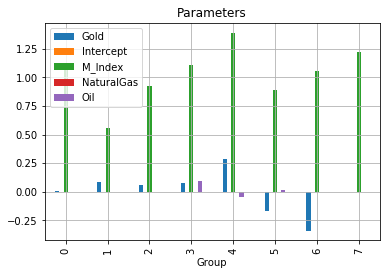

In [61]:
import matplotlib.pyplot as plt
average= df.groupby("Group").mean()
fig, plt.figure(figsize=(12,12))
fig= average.plot.bar()
fig.set_title("Parameters")
fig.grid()
plt.show()

#### VISUALIZATION OF GROUPING 

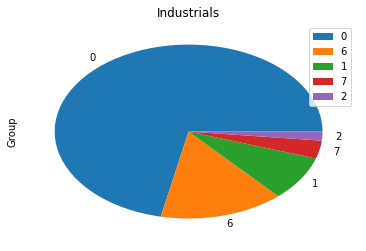

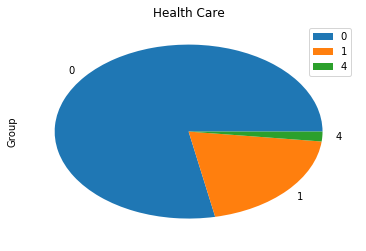

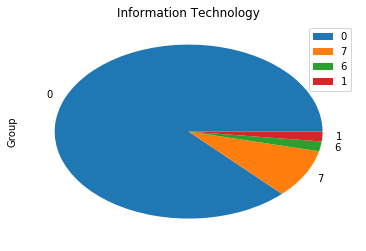

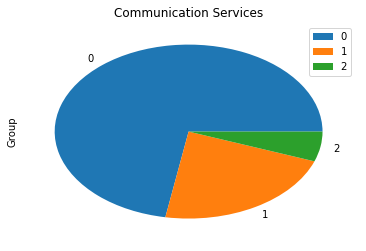

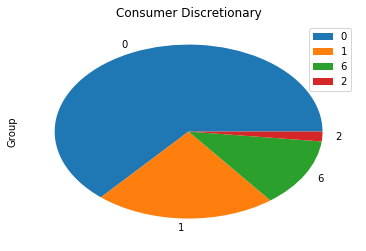

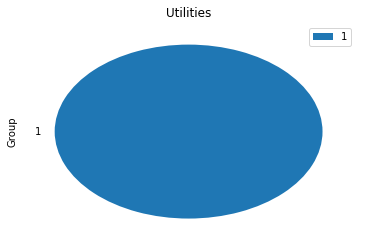

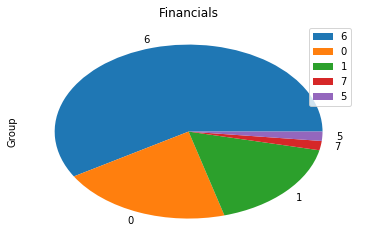

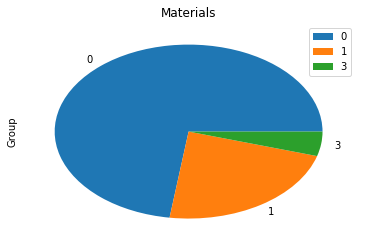

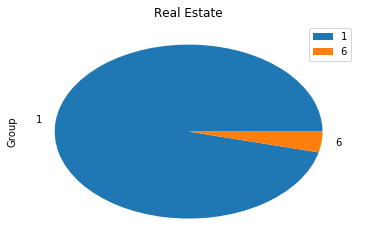

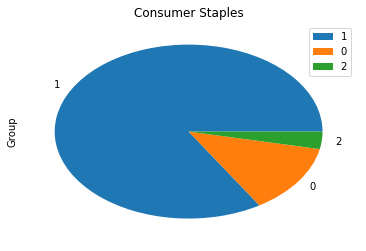

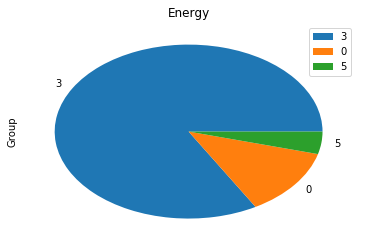

In [64]:
for x in df["Sector"].unique():
    frame = df[df["Sector"]==x]
    frame["Group"].value_counts().plot(kind='pie',legend=True,title=x)
    plt.show()